In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import us
from pprint import pprint
import scipy.stats as st
import numpy as np
from scipy.stats import linregress



resource_path = "../../Resources"
all_by_state_path = f"{resource_path}/AllByState.csv"
all_by_state_daily_path = f"{resource_path}/AllByState-Daily.csv"

In [2]:
all_by_state_df = pd.read_csv(all_by_state_path)
all_by_state_df.head()

,Active,Confirmed,Date,Deaths,Fatality Rate,Recovered,State Name,State,Land Area (mi2),Population,Population Density,Per Capita Income,Median Household Income
0,12,12,2020-03-15,0,0.0000,0,Alabama,AL,49481.34,4846150.0,97.93894,26883.102656,41750.0
1,1033,1060,2020-04-01,27,0.0255,0,Alabama,AL,49481.34,4846150.0,97.93894,26883.102656,41750.0
2,3957,4075,2020-04-15,118,0.0290,0,Alabama,AL,49481.34,4846150.0,97.93894,26883.102656,41750.0
3,7005,7294,2020-05-01,289,0.0396,0,Alabama,AL,49481.34,4846150.0,97.93894,26883.102656,41750.0
4,10890,11373,2020-05-15,483,0.0425,0,Alabama,AL,49481.34,4846150.0,97.93894,26883.102656,41750.0


In [3]:
all_by_state_daily_df = pd.read_csv(all_by_state_daily_path)
all_by_state_daily_df.head()

,Active,Confirmed,Date,Deaths,Fatality Rate,Recovered,State Name,State,Active Diff,Confirmed Diff,Deaths Diff,Recovered Diff,Lat,Lon,Land Area (mi2),Population,Population Density,Per Capita Income,Median Household Income
0,0,0,2020-03-10,0,0.0,0,Alaska,AK,0,0,0,0,61.3707,-152.4044,211300.81,734417.0,3.475694,35617.249121,51875.0
1,0,0,2020-03-11,0,0.0,0,Alaska,AK,0,0,0,0,61.3707,-152.4044,211300.81,734417.0,3.475694,35617.249121,51875.0
2,0,0,2020-03-12,0,0.0,0,Alaska,AK,0,0,0,0,61.3707,-152.4044,211300.81,734417.0,3.475694,35617.249121,51875.0
3,1,1,2020-03-13,0,0.0,0,Alaska,AK,1,1,0,0,61.3707,-152.4044,211300.81,734417.0,3.475694,35617.249121,51875.0
4,1,1,2020-03-15,0,0.0,0,Alaska,AK,0,0,0,0,61.3707,-152.4044,211300.81,734417.0,3.475694,35617.249121,51875.0


In [4]:
max_date = all_by_state_daily_df["Date"].max()
max_date

'2020-07-23'

In [5]:
max_date_df = all_by_state_daily_df.sort_values("Date", ascending = False)
max_date_df.head()

,Active,Confirmed,Date,Deaths,Fatality Rate,Recovered,State Name,State,Active Diff,Confirmed Diff,Deaths Diff,Recovered Diff,Lat,Lon,Land Area (mi2),Population,Population Density,Per Capita Income,Median Household Income
3397,2866,2909,2020-07-23,43,0.0148,0,Montana,MT,96,97,1,0,46.9219,-110.4544,135639.85,1038180.0,7.653945,29784.234687,49833.0
3533,23502,23818,2020-07-23,316,0.0133,0,Nebraska,NE,327,332,5,0,41.1254,-98.2681,76243.49,1900182.0,24.922547,31121.371768,55236.0
3125,46617,48053,2020-07-23,1436,0.0299,0,Mississippi,MS,969,982,13,0,32.7416,-89.6787,45729.42,2962109.0,64.774690,23556.907406,38418.0
2989,47120,48721,2020-07-23,1601,0.0329,0,Minnesota,MN,751,760,9,0,45.6945,-93.9002,77477.43,5523621.0,71.293291,36262.683567,60000.0
2853,78036,84431,2020-07-23,6395,0.0757,0,Michigan,MI,694,701,7,0,43.3266,-84.5361,55526.86,9935027.0,178.922903,30369.333747,52203.0


In [6]:
grouped_state_name = max_date_df.groupby(["State Name"])
grouped_state_name

confirmed = grouped_state_name["Confirmed"].max()
confirmed

population_density = grouped_state_name["Population Density"].max()
population_density

deaths = grouped_state_name["Deaths"].max()
deaths.head()

pop = grouped_state_name["Population"].mean()
pop

pop_df = pd.DataFrame({"Population": pop})
pop_max = pop_df.sort_values("Population", ascending = False)
pop_max.head()

,Population
State Name,
California,39076841.0
Texas,27830255.0
Florida,20568602.0
New York,19558293.0
Illinois,12815484.0


In [7]:
pop_density_df = pd.DataFrame({"Population Density": population_density,
                                "Deaths": deaths})
pop_density_vs_deaths = pop_density_df.sort_values("Population Density", ascending = False).head()
pop_density_vs_deaths

,Population Density,Deaths
State Name,,
New Jersey,1259.397075,15737
Rhode Island,1027.895605,1001
Massachusetts,880.152360,8484
Connecticut,739.092300,4410
Maryland,627.327655,3409


In [8]:
deaths_by_pop_density = pop_density_df.sort_values("Deaths", ascending = False).head()
deaths_by_pop_density

,Population Density,Deaths
State Name,,
New York,424.151807,32594
New Jersey,1259.397075,15737
Massachusetts,880.152360,8484
California,403.176406,8201
Illinois,233.446533,7560


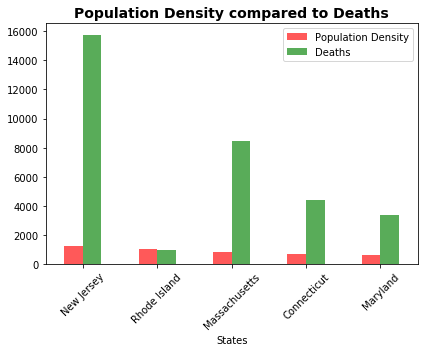

In [35]:
pop_density_vs_deaths.plot(kind = "bar", alpha = 0.65, color = ("r", "g"), align = "center", figsize = (6, 5), legend = True)
plt.title("Population Density compared to Deaths", fontsize= 14, fontweight = "bold")
plt.xlabel("States")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.savefig("Population Density compared to Deaths.png")
plt.show()

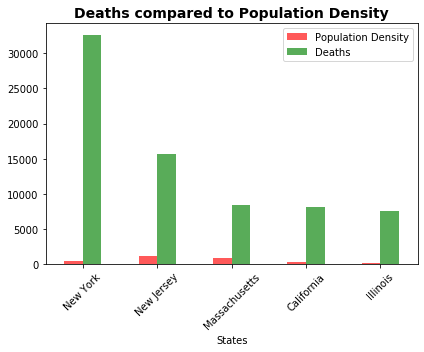

In [34]:
deaths_by_pop_density.plot(kind = "bar", alpha = 0.65, color = ("r", "g"), align = "center", figsize = (6, 5), legend = True)
plt.title("Deaths compared to Population Density", fontsize= 14, fontweight = "bold")
plt.xlabel("States")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.savefig("Deaths compared to Population Density.png")
plt.show()

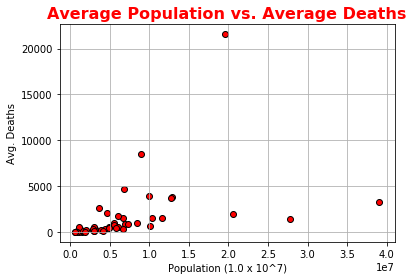

In [11]:
max_date_df

avg_pop = max_date_df.groupby(["State Name"])["Population"].mean()
avg_death = max_date_df.groupby(["State Name"])["Deaths"].mean()

plt.scatter(avg_pop, avg_death, marker = "o", facecolors = "red", edgecolors = "black")
plt.title("Average Population vs. Average Deaths", fontsize = 16, fontweight = "bold", color = "r")
plt.xlabel("Population (1.0 x 10^7)")
plt.ylabel("Avg. Deaths")
plt.grid()
plt.show()


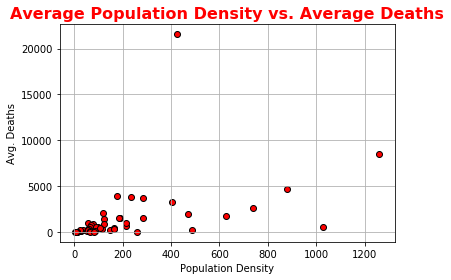

In [12]:
avg_pop_den= max_date_df.groupby(["State Name"])["Population Density"].mean()
avg_death = max_date_df.groupby(["State Name"])["Deaths"].mean()

plt.scatter(avg_pop_den, avg_death, marker = "o", facecolors = "red", edgecolors = "black")
plt.title("Average Population Density vs. Average Deaths", fontsize = 16, fontweight = "bold", color = "r")
plt.xlabel("Population Density")
plt.ylabel("Avg. Deaths")
plt.grid()
plt.show()

In [13]:
correlation = st.pearsonr(avg_pop_den, avg_death)
print(correlation)
print(f"The correlation between both factors is {round(correlation[0], 2)}")

(0.4355213485119, 0.0015715222136753117)
The correlation between both factors is 0.44


The r-squared value is: 0.1896788450096239


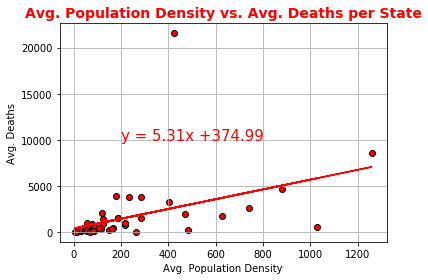

In [32]:
x_values = avg_pop_den
y_values = avg_death
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
plt.scatter(x_values, y_values, marker = "o", facecolors = "red", edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (200, 10000), fontsize = 15, color = "red")
plt.grid()
plt.title("Avg. Population Density vs. Avg. Deaths per State", fontsize = 14, fontweight = "bold", color = "r")
plt.xlabel("Avg. Population Density")
plt.ylabel("Avg. Deaths")
print(f"The r-squared value is: {rvalue**2}")
plt.tight_layout()
plt.savefig("Avg. Population Density vs. Avg. Deaths per State.png")
plt.show()

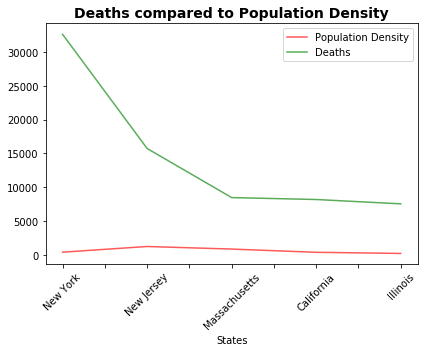

In [38]:
deaths_by_pop_density.plot(kind = "line", alpha = 0.65, color = ("r", "g"), figsize = (6, 5), legend = True)
plt.title("Deaths compared to Population Density", fontsize= 14, fontweight = "bold")
plt.xlabel("States")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.savefig("Deaths compared to Population Density.png")
plt.show()

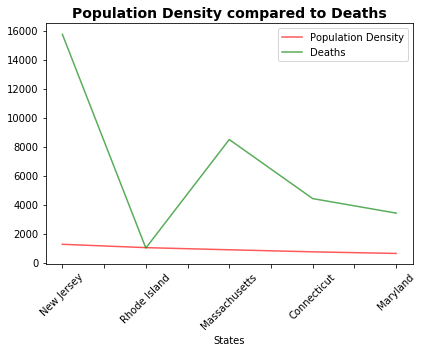

In [40]:
pop_density_vs_deaths.plot(kind = "line", alpha = 0.65, color = ("r", "g"), figsize = (6, 5), legend = True)
plt.title("Population Density compared to Deaths", fontsize= 14, fontweight = "bold")
plt.xlabel("States")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.savefig("Population Density compared to Deaths.png")
plt.show()